# Importing Libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading csv file

In [22]:
df=pd.read_csv("/content/Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [23]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [24]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [25]:
#Shape(rows and columns)
df.shape

(200, 5)

In [26]:
df.info() #Information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [28]:
#drop the 1st column
df=df.iloc[:,1:]

In [32]:
#check for null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
#desciption of the dataset
df.describe()

# Data Visualization

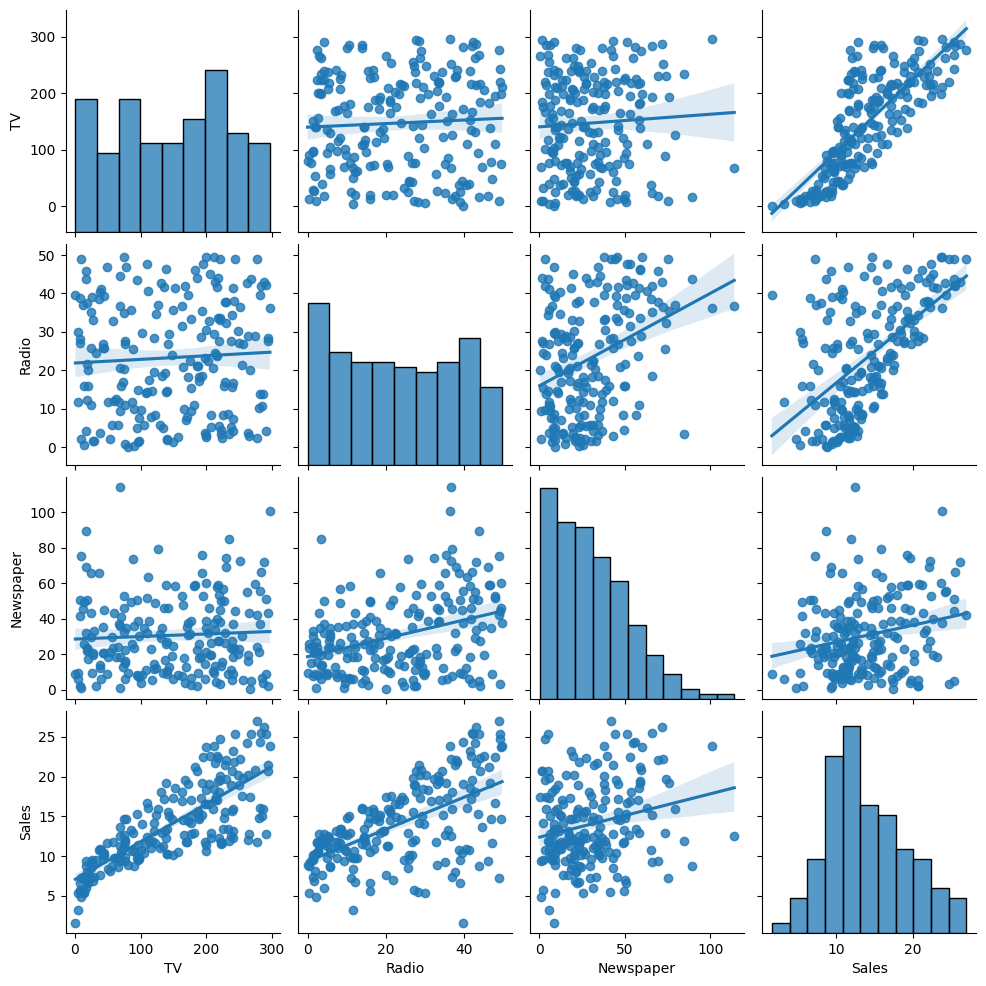

In [35]:
sns.pairplot(df,kind="reg");

<Axes: xlabel='Newspaper', ylabel='Sales'>

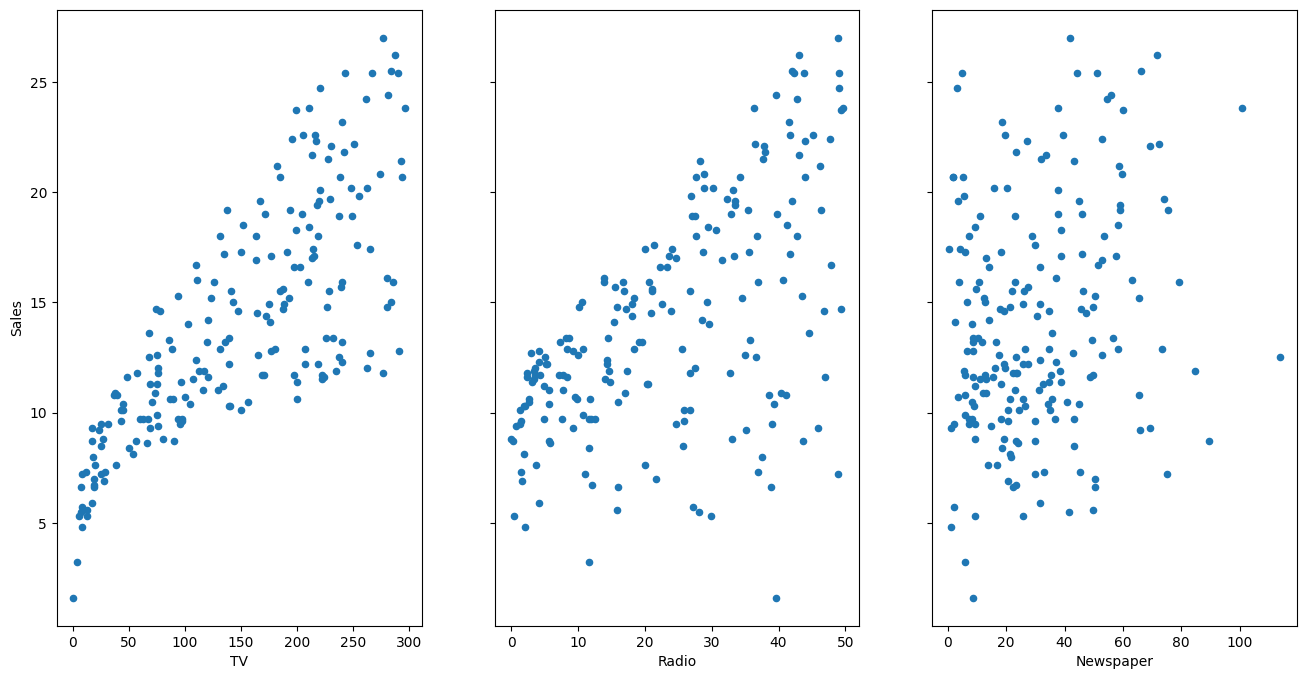

In [36]:
fig,axs=plt.subplots(1,3,sharey=True)
df.plot(kind="scatter",x="TV",y="Sales",ax=axs[0],figsize=(16,8))
df.plot(kind="scatter",x="Radio",y="Sales",ax=axs[1],figsize=(16,8))
df.plot(kind="scatter",x="Newspaper",y="Sales",ax=axs[2],figsize=(16,8))

In [52]:
#removing the outlier from newspaper
df=df[df['Newspaper']<=90]
df.shape

(198, 4)

In [53]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.051978,0.049771,0.779121
Radio,0.051978,1.000000,0.346364,0.576748
Newspaper,0.049771,0.346364,1.000000,0.219555
Sales,0.779121,0.576748,0.219555,1.000000


In [54]:
#Separating input and output data
x=df.drop(columns=["Sales"])
y=df["Sales"]

In [55]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [56]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [59]:
x_train.tail()

,TV,Radio,Newspaper
66,31.5,24.6,2.2
86,76.3,27.5,16.0
111,241.7,38.0,23.2
78,5.4,29.9,9.4
137,273.7,28.9,59.7


In [60]:
y_test.tail()

70     18.3
198    25.5
124    19.7
103    14.7
75      8.7
Name: Sales, dtype: float64

In [61]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [62]:
column_trans=make_column_transformer((OneHotEncoder(sparse=False),[]),remainder="passthrough")
scaler=StandardScaler()
oe=OrdinalEncoder()

In [63]:
#Random Forest Regression Model

from sklearn.ensemble import RandomForestRegressor
r=RandomForestRegressor(n_estimators=10,random_state=0)
pipe=make_pipeline(column_trans,scaler,r)
pipe.fit(x_train,y_train)
y_pred_r=pipe.predict(x_test)
r2_score(y_test,y_pred_r)

0.9633194016799226

In [64]:
# Lets check predict function 
pipe.predict([[283.6,42.0,66.2]])

array([24.48])